In [1]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [2]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util,correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


<module 'R2h_module' from '/home/sebouh/di-hadron/R2h_module.py'>

In [5]:
dfs_data = {}
dfs_trigger = {}

In [6]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

pathGIBUU="./"
for target in ['D','C','Fe','Pb']:
    #GiBUU
    print (target)
    print (' trigger')
    dfs_trigger['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), 
                                                           '%s_trigger'%target)
    print (' pairs')
    dfs_data['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), target)
print (dfs_trigger.keys())

D
 trigger
 pairs
C
 trigger
 pairs
Fe
 trigger
 pairs
Pb
 trigger
 pairs
dict_keys(['GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb'])


In [35]:
for target in ['D','C','Fe','Pb']:
    #GiBUU
    print (' pairs')
    dfs_data['GiBUU_%s_2pi'%target]= dfs_data['GiBUU_%s'%target].query("h1_pid*h2_pid==-211**2")
print (dfs_trigger.keys())

 pairs
 pairs
 pairs
 pairs
dict_keys(['GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb'])


In [7]:
dfs_data['GiBUU_C'].columns

Index(['dphi', 'dphi_lab', 'qt', 'drap', 'h1_z', 'h2_z', 'z_tot', 'h1_xf',
       'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph',
       'h2_cm_ph', 'h1_cm_pt', 'h2_cm_pt', 'h1_cm_th', 'h2_cm_th', 'pair_mass',
       'pair_pt', 'mx_eh1h2', 'Q2', 'x', 'nu', 'W', 'h1_ph', 'h1_th', 'h2_ph',
       'h2_th', 'pos_x', 'pos_y', 'pos_z', 'pos_x_asso', 'pos_y_asso',
       'pos_z_asso'],
      dtype='object')

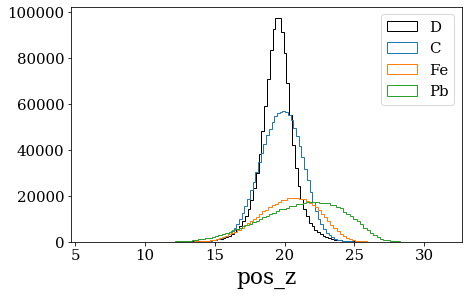

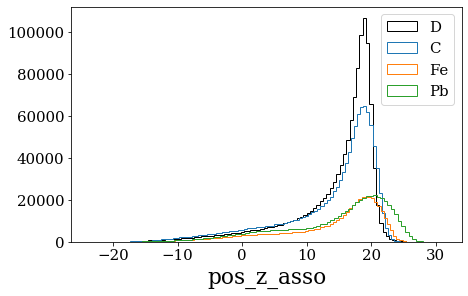

In [48]:
for a,col in zip("D C Fe Pb".split(), "k tab:blue tab:orange tab:green".split()):
    df =dfs_data[f'GiBUU_{a}_2pi']
    plt.hist(df.pos_z,bins=100,histtype='step',color=col, label=a)
plt.legend()
plt.gca().set_xlabel("pos_z")
plt.show()

for a,col in zip("D C Fe Pb".split(), "k tab:blue tab:orange tab:green".split()):
    df =dfs_data[f'GiBUU_{a}_2pi']
    plt.hist(df.pos_z_asso,bins=100,histtype='step',color=col, label=a)
plt.legend()
plt.gca().set_xlabel("pos_z_asso")
plt.show()

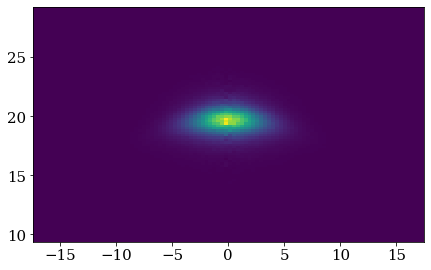

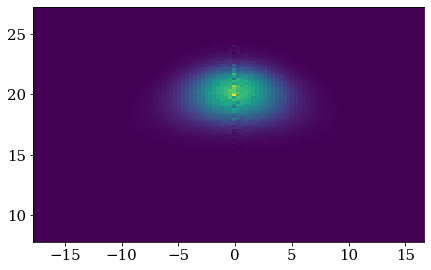

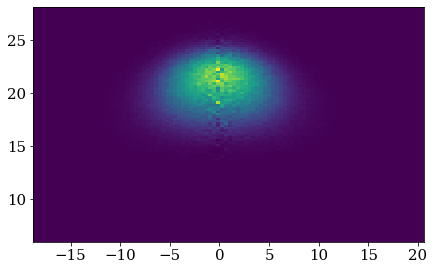

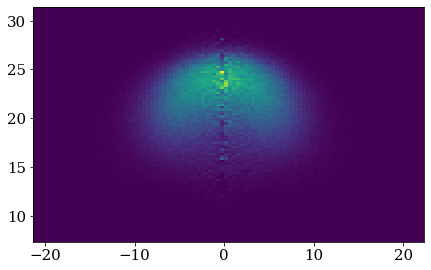

In [39]:
for a in "D C Fe Pb".split():
    df =dfs_data[f'GiBUU_{a}_2pi']
    plt.hist2d(df.eval("sqrt(pos_x**2+pos_y**2)*(2*(pos_x>0)-1)") , df.pos_z,bins=100,
              weights=df.eval("1/sqrt(pos_x**2+pos_y**2)"))
    plt.show()

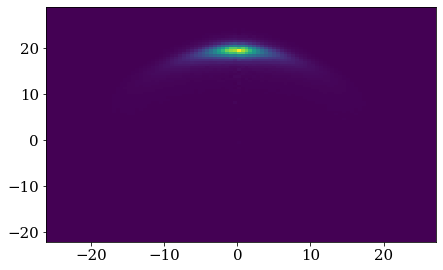

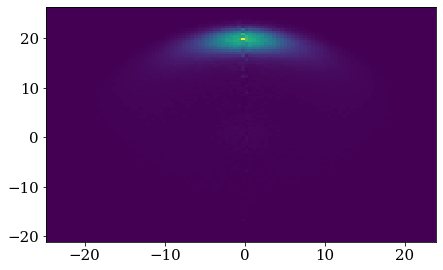

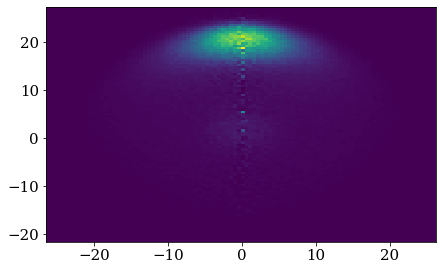

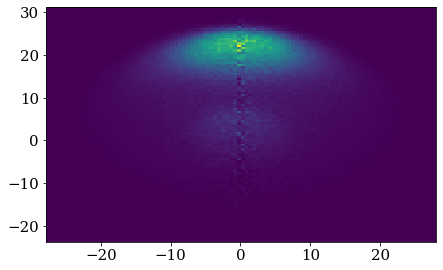

In [43]:
for a in "D C Fe Pb".split():
    df =dfs_data[f'GiBUU_{a}_2pi']
    plt.hist2d(df.eval("sqrt(pos_x_asso**2+pos_y_asso**2)*(2*(pos_x_asso>0)-1)") , df.pos_z_asso,bins=100,
              weights=df.eval("1/sqrt(pos_x_asso**2+pos_y_asso**2)"))
    plt.show()

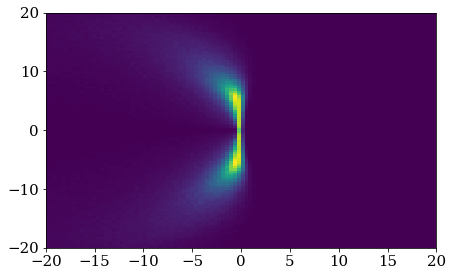

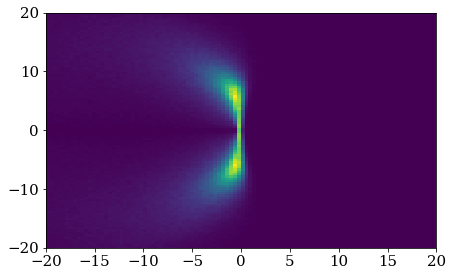

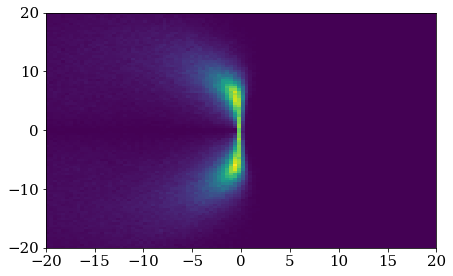

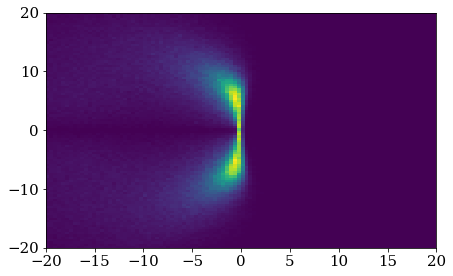

In [41]:
for a in "D C Fe Pb".split():
    df =dfs_data[f'GiBUU_{a}_2pi'].query("pos_x_asso!=pos_x and pos_z_asso!=pos_z")
    plt.hist2d(df.eval("pos_z_asso-pos_z"),df.eval("sqrt((pos_x_asso-pos_x)**2+(pos_y_asso-pos_y)**2)*(2*(pos_x_asso-pos_x>0)-1)") , 
               bins=100,
              #weights=df.eval("1/sqrt((pos_x_asso-pos_x)**2+(pos_y_asso-pos_y)**2)"),
              range=((-20,20),(-20,20)))
    plt.show()

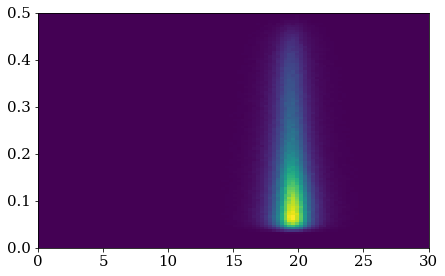

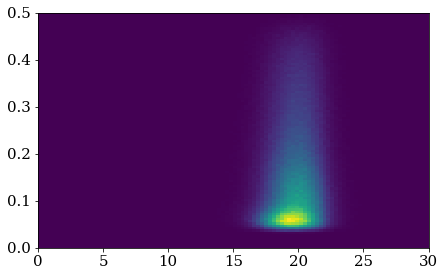

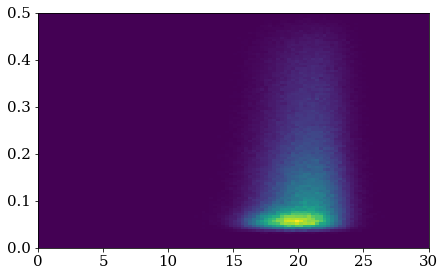

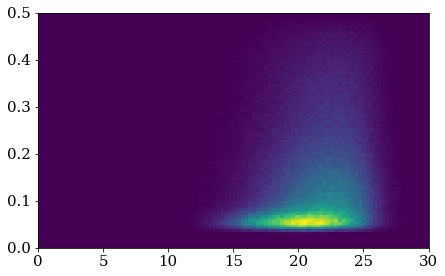

In [38]:
for a in "D C Fe Pb".split():
    df =dfs_data[f'GiBUU_{a}_2pi'].query("pos_x_asso!=pos_x and pos_z_asso!=pos_z")
    plt.hist2d(df.eval("pos_z"),df.eval("h2_z") , 
               bins=100, range=((0, 30),(0,0.5)))
    plt.show()

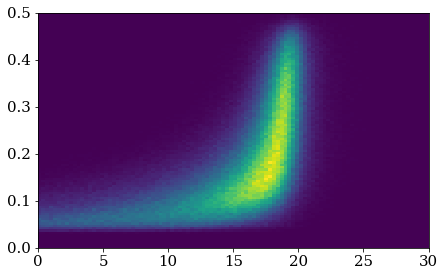

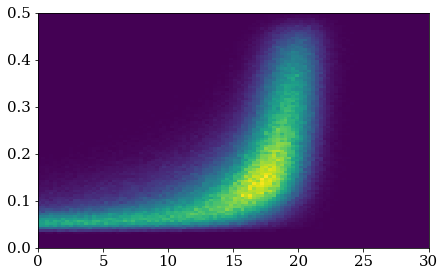

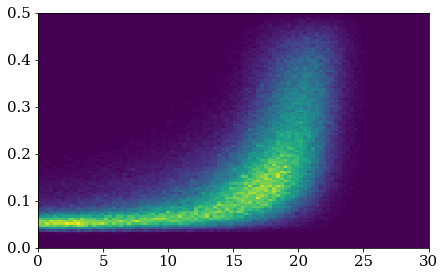

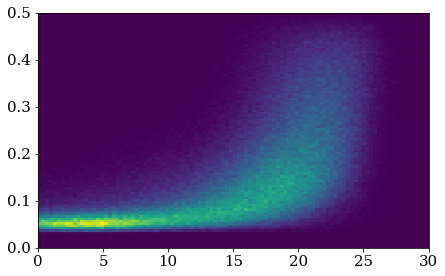

In [42]:
for a in "D C Fe Pb".split():
    df =dfs_data[f'GiBUU_{a}_2pi'].query("pos_x_asso!=pos_x and pos_z_asso!=pos_z")
    plt.hist2d(df.eval("pos_z_asso"),df.eval("h2_z") , 
               bins=100, range=((0, 30),(0,0.5)))
    plt.show()